In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [2]:
ds = pd.read_csv('/content/Admission_Predict.csv')

In [3]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [7]:
ds.shape

(400, 9)

In [8]:
ds.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [9]:
ds.fillna(0, inplace = True)
ds.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


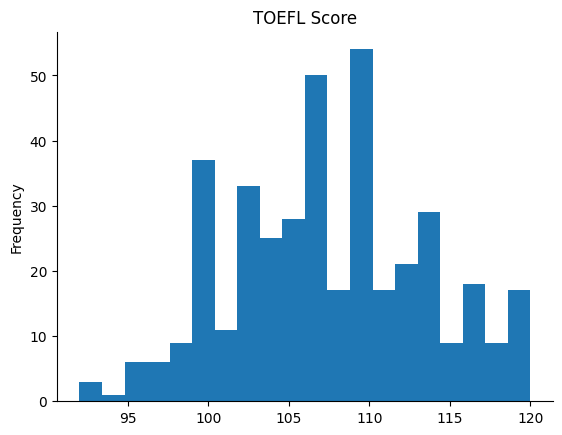

In [10]:
from matplotlib import pyplot as plt
ds['TOEFL Score'].plot(kind='hist', bins = 20, title = 'TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

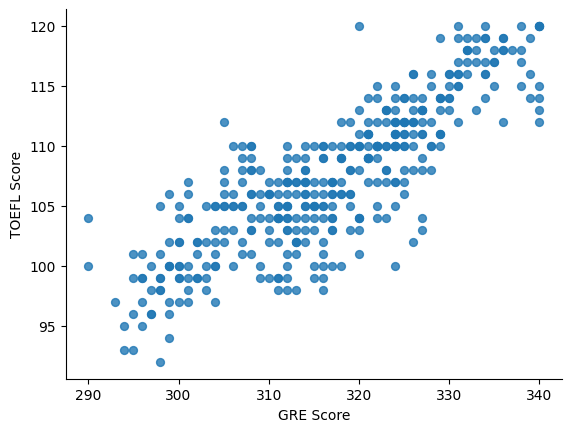

In [11]:
from matplotlib import pyplot as plt
ds.plot(kind = 'scatter', x = 'GRE Score', y = 'TOEFL Score', s=32, alpha = 0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
label_encoder = LabelEncoder()
ds['Research'] = label_encoder.fit_transform(ds['Research'])

In [14]:
x = ds[['GRE Score', 'CGPA']]
y = ds['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_test = np.array(y_test)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (320, 2)
x_test shape: (80, 2)
y_train shape: (320,)
y_test shape: (80,)


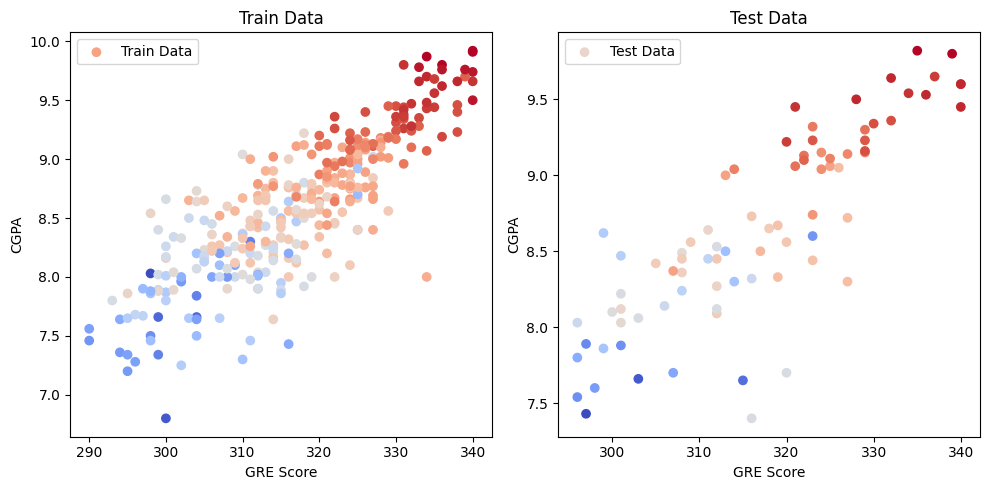

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train['GRE Score'], x_train['CGPA'], c=y_train, cmap='coolwarm', marker='o', label='Train Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test['GRE Score'], x_test['CGPA'], c=y_test, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Test Data')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
model= DecisionTreeClassifier(max_depth=3,random_state=42)
y_train_binary = (y_train > 0.5).astype(int)
model.fit(x_train,y_train_binary)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
y_pred = model.predict(x_test)
ypred = np.array(y_pred)
print(y_pred.shape)

(80,)


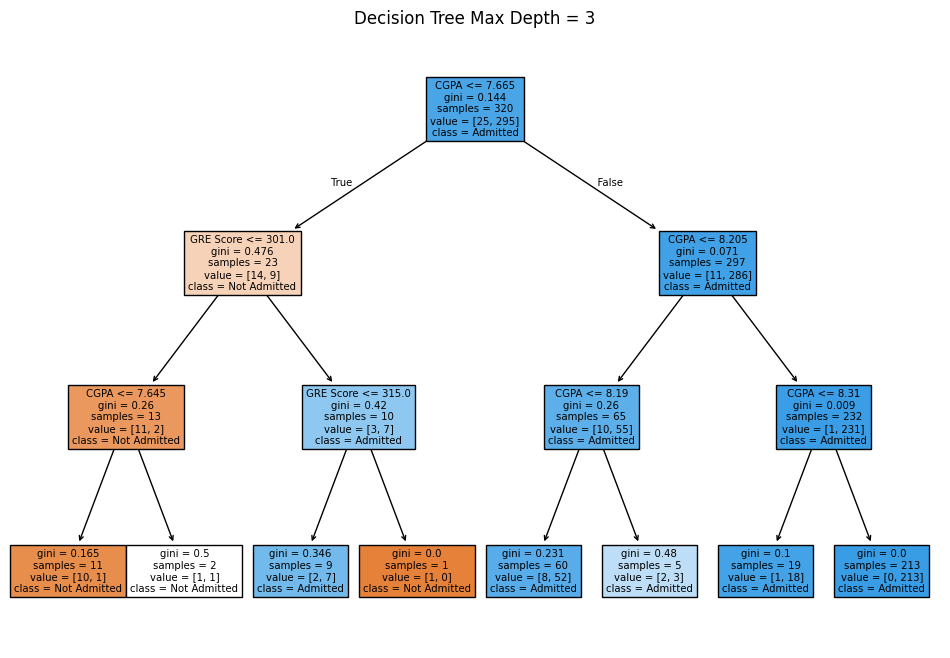

In [18]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()